### Background:
A research institute conducts a  talent hunt examination every year to hire people who can work on various research projects in the field of Mathematics and Computer Science. ‘A2Z’ institute provides a preparatory program to help the aspirants prepare for the talent hunt exam. The institute has a good record of helping many students clear the exam. Before the application for the next batch starts, the institute wants to attract more aspirants to their program. For this, the institute wants to assure the aspiring students of the quality of results obtained by students enrolled in their program in recent years. 

However, one challenge in estimating an average score is that every year the exam’s difficulty level varies a little, and the distribution of scores also changes accordingly. The institute keeps a track of the final scores of its alumni who attempted the exam previously. A dataset constituted of a simple random sample of final scores of 600 aspirants from the last three years is prepared by the institute.

### Objective:

The institute wants to provide an estimate of the average score obtained by aspirants enrolled in their program. Keeping in mind the variation in scores every year, the institute wants to estimate a range of scores instead of a single estimate of the average score, to make the estimate more robust. It is known from the history of scores in the exam that the standard deviation of the scores is 10. And the cut-off score in the most recent year was 84.

Using the data of the final scores, the institute wants to perform the following task to complete the objective:

1. Construct a 95% confidence interval for the mean score that an aspirant has scored after enrolling in the institute’s program.


2. Perform a hypothesis test (taking alpha = 5%) to check if the mean score of the aspirants enrolled in the program is less than the last year’s cut-off score, which is 84. Using the test results, verify the confidence interval constructed for the mean score.


### Dataset: 
The dataset contains the final scores of 600 aspirants enrolled in the institute’s program in the last three years.

### Import the libraries 

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

### Read the data

In [2]:
df = pd.read_csv('Talent_hunt.csv')

In [3]:
df.head()

,final_score
0,85.55
1,81.11
2,91.47
3,83.13
4,82.73


In [4]:
df.shape

(600, 1)

The dataset contains 600 data points

### Visualize data

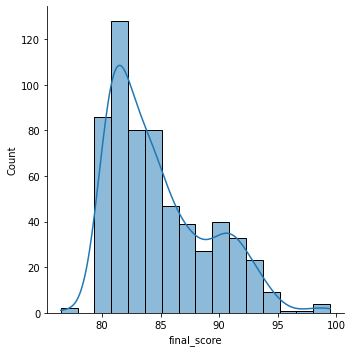

In [5]:
# plot a density curve of the distribution of the scores
sns.displot(df.final_score,kde=True)
plt.show()

The scores distribution is a little skewed to the right. Majority of aspirants have scored between 81 and 87

### 1. Construct a 95% confidence interval for the mean score secured by an aspirant after enrolling in the institute’s program.

In [6]:
# import the required function
from scipy.stats import norm

# calculate the value of sample mean. Population standard deviation is known to be 10
x_bar = df.final_score.mean()
sigma = 10

n = 600 #sample size

# construct the confidence interval
np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

array([84.02, 85.62])

The 95% confidence interval obtained for the mean score is [84.02, 85.62]. This means that it is 95% likely that an aspirant enrolled in the institute's program will score, on average, between 84.02 and 85.62.

### 2. Perform a hypothesis test (taking alpha = 5%) to check if the mean score of the aspirants enrolled in the program is less than last year’s cut-off score of 84. Using the test results, verify the confidence interval constructed for the mean score.

**Let's write the null and alternative hypotheses**

Let $\mu$ be the mean final_score of all aspirants who enroll in the institute's program.

The null and alternative hypothesis can be written as:

>$H_0: \mu >= 84$

against the alternate hypothesis

> $H_a: \mu < 84$

**Are the assumptions of Z-test satisfied?**

*   Samples are drawn from a normal distribution - Since the sample size is 600(which is > 30), Central Limit Theorem states that the distribution of sample means will be approximately normal.  
*   Observations are from a simple random sample - the institute collected a simple random sample
*   Standard deviation is known - Yes


Voila! We can use Z-test for this problem.

**Calculate the Z-statistic value**

In [7]:
# set the values of population mean and population standard deviation 
mu, sigma = 84, 10

# calculate the value of the sample mean from the data
x_bar = df.final_score.mean()


# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(600))
test_stat

2.008581589082085

**The Z test statistic follows a standard normal distribution.**

Let's plot the distribution of the Z test statistic and see where the computed test statistic lies in the plot.

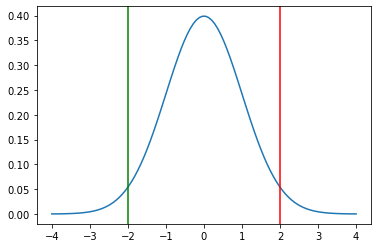

In [10]:
# import the required function
from scipy.stats import norm

# plotting the distribution of Z test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = test_stat, c = 'r') # draw a vertical red line through the mentioned point
plt.axvline(x = -2, c = 'g')

plt.show() # display the plot

As this is a left-tailed test, the p-value will be the area to the left of the test statistic under the standard normal curve.

In [11]:
# calculate the p-value using the cdf() function
1 - norm.cdf(test_stat)

0.02229076271630992

### Insight

As the p-value ~0.98 is greater than the level of significance (0.05), we fail to reject the null hypothesis. Thus, we do not have enough statistical evidence to say that the mean final score of all aspirants who enroll in the institute's program is less than last year's cutoff of 84.

This result validates the confidence interval as well. The 95% confidence interval for the mean final score was [84.02,85.62]. And using a statistical hypothesis test at 5% alpha, we did not find significant evidence that the mean final score is less than 84. 

### Key Takeaways

* The estimation theory helped in estimating the mean score of the aspirants who enrolled in the institute's program with 95% confidence.
* The statistical test helped us in validating the confidence interval.